# Experiment 2
Below is the pipline given for the first experiment. The corpus files are first extracted, after which the pre-processing steps are done. The filtered and prepared corpus is saved to be used in the topic modelling algorithm. The orignal corpus is also saved, together with its dictionary and other statistics. The created corpus is then used in some coherence measures and inspected. Based on this is the right amount of topics chosen. This is further analysed, shown and saved. 

## Reading the files

In [224]:
import os
import sys 
sys.path.append('/home/vanwissen/degids/')

from modules.DeGids.DeGids import FoliaCorpus
from modules.DeGids.DeGids import DeGids

from pynlpl.formats import folia

%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib2tikz import save as tikz_save

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pickle

In [18]:
from gensim.corpora import MmCorpus
from gensim.models import CoherenceModel, LdaModel, LdaMulticore

In [19]:
CORPUS = "/mnt/scistor1/group/home/vanwissen/degids_1837_1936/"
METAFILES = "/home/vanwissen/degids/data/metadata_auteursinformatie/"

### Corpus

In [4]:
fcorpus = FoliaCorpus(corpuspath=CORPUS,
                            metafiles=METAFILES, 
                            dictionary=None, 
                            years=(1894, 1906), 
                            lemma=True, 
                            add_entities=True, 
                            remove_stopwords=True, 
                            stopwordsfile='../../data/stoplist_dutch.txt',  
                            remove_accents=True, 
                            remove_nonalpha=True, 
                            remove_punctuation=True, 
                            remove_hyphenation=True, 
                            remove_apostrophe=True, 
                            transform_lowercase=True,
                            gzipped=False
                           )

2018-09-25 15:35:51,439 : INFO : Initializing dictionary
2018-09-25 15:35:51,442 : INFO : Quering texts from 1894-1906
2018-09-25 15:35:51,863 : INFO : Reading _gid001189401_01_0001 (1894) De wederopluiking van het Katholicisme in Noord-Nederland, omstreeks den aanvang der XVII e eeuw.
2018-09-25 15:35:59,490 : INFO : Reading _gid001189401_01_0002 (1894) Wapenstilstand.
2018-09-25 15:36:03,266 : INFO : Reading _gid001189401_01_0003 (1894) Uit de geschiedenis van Japan.
2018-09-25 15:36:12,882 : INFO : Reading _gid001189401_01_0004 (1894) Onbekenden.
2018-09-25 15:36:23,352 : INFO : Reading _gid001189401_01_0005 (1894) Een avond.
2018-09-25 15:36:26,341 : INFO : Reading _gid001189401_01_0006 (1894) Reisindrukken uit de Vereenigde-Staten.
2018-09-25 15:36:38,350 : INFO : Reading _gid001189401_01_0007 (1894) Dramatisch overzicht.
2018-09-25 15:36:40,041 : INFO : Reading _gid001189401_01_0008 (1894) Buitenlandsch overzicht.
2018-09-25 15:36:42,272 : INFO : Reading _gid001189401_01_0009 (18

2018-09-25 15:42:07,943 : INFO : Reading _gid001189401_01_0085 (1894) Van een dooden Mandarijn.
2018-09-25 15:42:09,730 : INFO : Reading _gid001189401_01_0086 (1894) Dooden op weg naar Apollo.
2018-09-25 15:42:11,716 : INFO : Reading _gid001189401_01_0087 (1894) Kindersproke.
2018-09-25 15:42:12,098 : INFO : Reading _gid001189401_01_0088 (1894) Letterkundige kroniek.
2018-09-25 15:42:14,595 : INFO : Reading _gid001189401_01_0089 (1894) Buitenlandsch overzicht.
2018-09-25 15:42:15,855 : INFO : Reading _gid001189401_01_0090 (1894) Bibliographie.
2018-09-25 15:42:16,655 : INFO : Reading _gid001189401_01_0091 (1894) Walt Whitman .
2018-09-25 15:42:26,786 : INFO : Reading _gid001189401_01_0092 (1894) Afstammingsleer en Darwinisme door Lord Salisbury geoordeeld.
2018-09-25 15:42:30,791 : INFO : Reading _gid001189401_01_0093 (1894) Over den oorsprong van den Ridder met den zwaan.
2018-09-25 15:42:37,032 : INFO : Reading _gid001189401_01_0094 (1894) Verwey's bloemlezingen van Nederlandsche dic

2018-09-25 15:47:40,762 : INFO : Reading _gid001189501_01_0048 (1895) Bijgeloof in Japan.
2018-09-25 15:47:44,769 : INFO : Reading _gid001189501_01_0049 (1895) Ozon als zuiveringsmiddel van drinkwater.
2018-09-25 15:47:46,400 : INFO : Reading _gid001189501_01_0050 (1895) Een Fransch boek over de geschiedenis der Bataafsche republiek.
2018-09-25 15:47:48,992 : INFO : Reading _gid001189501_01_0051 (1895) Aanteekeningen en opmerkingen.
2018-09-25 15:47:49,701 : INFO : Reading _gid001189501_01_0052 (1895) Verzen.
2018-09-25 15:47:50,406 : INFO : Reading _gid001189501_01_0053 (1895) Letterkundige kroniek.
2018-09-25 15:47:51,905 : INFO : Reading _gid001189501_01_0054 (1895) Muzikaal overzicht.
2018-09-25 15:47:54,794 : INFO : Reading _gid001189501_01_0055 (1895) Zielebanden.
2018-09-25 15:47:59,033 : INFO : Reading _gid001189501_01_0056 (1895) De Shah van Perzie over Nederland in 1888.
2018-09-25 15:48:06,824 : INFO : Reading _gid001189501_01_0057 (1895) De nieuwe elementen, Argon en Helium

2018-09-25 15:53:02,583 : INFO : Reading _gid001189601_01_0003 (1896) 't Fries en z'n studie.
2018-09-25 15:53:09,608 : INFO : Reading _gid001189601_01_0004 (1896) Onderzoek naar het vaderschap.
2018-09-25 15:53:15,888 : INFO : Reading _gid001189601_01_0005 (1896) Platonische studiën.
2018-09-25 15:53:22,970 : INFO : Reading _gid001189601_01_0006 (1896) ‘Leerling!’
2018-09-25 15:53:25,690 : INFO : Reading _gid001189601_01_0007 (1896) Verzen.
2018-09-25 15:53:26,546 : INFO : Reading _gid001189601_01_0008 (1896) Dramatisch overzicht.
2018-09-25 15:53:28,124 : INFO : Reading _gid001189601_01_0009 (1896) Muzikaal overzicht.
2018-09-25 15:53:32,422 : INFO : Reading _gid001189601_01_0010 (1896) Aanteekeningen en opmerkingen.
2018-09-25 15:53:33,017 : INFO : Reading _gid001189601_01_0011 (1896) Buitenlandsch overzicht.
2018-09-25 15:53:34,505 : INFO : Reading _gid001189601_01_0012 (1896) Bibliographie.
2018-09-25 15:53:34,966 : INFO : Reading _gid001189601_01_0013 (1896) Kwan Yin, De godin de

2018-09-25 15:58:23,304 : INFO : Reading _gid001189601_01_0089 (1896) Egidius en de vreemdeling.
2018-09-25 15:58:27,939 : INFO : Reading _gid001189601_01_0090 (1896) Nederland en de Berner Conventie.
2018-09-25 15:58:33,734 : INFO : Reading _gid001189601_01_0091 (1896) Nederland en de Berner Conventie.
2018-09-25 15:58:37,286 : INFO : Reading _gid001189601_01_0092 (1896) De Hongi-tochten.
2018-09-25 15:58:45,120 : INFO : Reading _gid001189601_01_0093 (1896) Het geruchtmakend huwelijk. Naar G. Meredith.
2018-09-25 15:58:53,852 : INFO : Reading _gid001189601_01_0094 (1896) Dramatische dictie.
2018-09-25 15:58:59,984 : INFO : Reading _gid001189601_01_0095 (1896) Annunziata.
2018-09-25 15:59:00,337 : INFO : Reading _gid001189601_01_0096 (1896) Letterkundige kroniek.
2018-09-25 15:59:02,475 : INFO : Reading _gid001189601_01_0097 (1896) Muzikaal overzicht.
2018-09-25 15:59:05,932 : INFO : Reading _gid001189601_01_0098 (1896) Buitenlandsch overzicht.
2018-09-25 15:59:06,831 : INFO : Reading 

2018-09-25 16:03:23,369 : INFO : Reading _gid001189701_01_0038 (1897) Metamorfoze.
2018-09-25 16:03:41,586 : INFO : Reading _gid001189701_01_0039 (1897) De strijd om de Brielsche Zeenimf.
2018-09-25 16:03:48,522 : INFO : Reading _gid001189701_01_0040 (1897) De val van Formosa.
2018-09-25 16:03:56,052 : INFO : Reading _gid001189701_01_0041 (1897) Akëdysseril vertaald.
2018-09-25 16:04:00,036 : INFO : Reading _gid001189701_01_0042 (1897) Bep, die dwaze jongen.
2018-09-25 16:04:02,467 : INFO : Reading _gid001189701_01_0043 (1897) De ligue tegen de tuberculose.
2018-09-25 16:04:05,267 : INFO : Reading _gid001189701_01_0044 (1897) Letterkundige kroniek.
2018-09-25 16:04:06,990 : INFO : Reading _gid001189701_01_0045 (1897) Aanteekeningen en opmerkingen.
2018-09-25 16:04:07,757 : INFO : Reading _gid001189701_01_0046 (1897) Muzikaal overzicht.
2018-09-25 16:04:11,044 : INFO : Reading _gid001189701_01_0047 (1897) Buitenlandsch overzicht.
2018-09-25 16:04:11,708 : INFO : Reading _gid001189701_01

2018-09-25 16:09:32,123 : INFO : Reading _gid001189701_01_0125 (1897) Liederen.
2018-09-25 16:09:32,509 : INFO : Reading _gid001189701_01_0126 (1897) Sonnetten.
2018-09-25 16:09:32,964 : INFO : Reading _gid001189701_01_0127 (1897) Verzen.
2018-09-25 16:09:33,298 : INFO : Reading _gid001189701_01_0128 (1897) Dramatisch overzicht.
2018-09-25 16:09:36,058 : INFO : Reading _gid001189701_01_0129 (1897) Muzikaal overzicht.
2018-09-25 16:09:39,839 : INFO : Reading _gid001189701_01_0130 (1897) Buitenlandsch overzicht.
2018-09-25 16:09:41,299 : INFO : Reading _gid001189701_01_0131 (1897) Bibliographie.
2018-09-25 16:09:41,617 : INFO : Reading _gid001189701_01_0132 (1897) Register der in dezen jaargang behandelde werken.
2018-09-25 16:09:42,335 : INFO : Reading _gid001189801_01_0001 (1898) Psyche.
2018-09-25 16:10:04,336 : INFO : Reading _gid001189801_01_0002 (1898) Tuinbouw-gehuchten. Een schetsplan .
2018-09-25 16:10:07,579 : INFO : Reading _gid001189801_01_0003 (1898) Erfelijkheid.
2018-09-25

2018-09-25 16:15:43,045 : INFO : Reading _gid001189801_01_0081 (1898) Buitenlandsch overzicht.
2018-09-25 16:15:43,853 : INFO : Reading _gid001189801_01_0082 (1898) Bibliographie.
2018-09-25 16:15:44,420 : INFO : Reading _gid001189801_01_0083 (1898) Pro Patria.
2018-09-25 16:15:52,589 : INFO : Reading _gid001189801_01_0084 (1898) Handenarbeid op de lagere school.
2018-09-25 16:15:57,880 : INFO : Reading _gid001189801_01_0085 (1898) Een blik op het Indisch tooneel.
2018-09-25 16:16:04,797 : INFO : Reading _gid001189801_01_0086 (1898) Het poëzie-album van Louise de Coligny.
2018-09-25 16:16:09,374 : INFO : Reading _gid001189801_01_0087 (1898) De laatste regeeringsjaren van Willem III. (1698-1702)
2018-09-25 16:16:13,790 : INFO : Reading _gid001189801_01_0088 (1898) Aanteekeningen en opmerkingen.
2018-09-25 16:16:15,136 : INFO : Reading _gid001189801_01_0089 (1898) Dramatisch overzicht.
2018-09-25 16:16:16,261 : INFO : Reading _gid001189801_01_0090 (1898) Letterkundige kroniek.
2018-09-25

2018-09-25 16:20:26,624 : INFO : Reading _gid001189901_01_0037 (1899) R. Fruin. III. De eerste tijd van het professoraat.
2018-09-25 16:20:29,566 : INFO : Reading _gid001189901_01_0038 (1899) R. Fruin. IV. ( Vervolg .) De eerste tijd van het professoraat.
2018-09-25 16:20:33,253 : INFO : Reading _gid001189901_01_0039 (1899) Worstelend Zeeland.
2018-09-25 16:20:42,271 : INFO : Reading _gid001189901_01_0040 (1899) Sonnetten.
2018-09-25 16:20:42,987 : INFO : Reading _gid001189901_01_0041 (1899) Tijd- en strijdvragen op defensiegebied.
2018-09-25 16:20:50,705 : INFO : Reading _gid001189901_01_0042 (1899) Naar de gele rivier.
2018-09-25 16:20:56,407 : INFO : Reading _gid001189901_01_0043 (1899) Beeldende kunst.
2018-09-25 16:20:57,753 : INFO : Reading _gid001189901_01_0044 (1899) Muzikaal overzicht.
2018-09-25 16:21:00,795 : INFO : Reading _gid001189901_01_0045 (1899) Dramatisch overzicht.
2018-09-25 16:21:02,119 : INFO : Reading _gid001189901_01_0046 (1899) Buitenlandsch overzicht.
2018-09

KeyboardInterrupt: 

In [ ]:
fcorpus.statistics

#### Filtering

In [45]:
fcorpus.filter(min_dfs=5, max_dfs=0.75, min_tfs=10)

In [53]:
fcorpus.statistics

{'documents:': 1642, 'tokens': 2998698, 'vocabulary size': 26018}

#### Saving

In [ ]:
fcorpus.serialize('1894-1906')

2018-09-24 19:21:15,649 : INFO : storing corpus in Matrix Market format to 1894-1906.mmcorpus
2018-09-24 19:21:15,651 : INFO : saving sparse matrix to 1894-1906.mmcorpus
2018-09-24 19:21:15,654 : INFO : Quering texts from 1894-1906
2018-09-24 19:21:16,081 : INFO : Reading _gid001189401_01_0001 (1894) De wederopluiking van het Katholicisme in Noord-Nederland, omstreeks den aanvang der XVII e eeuw.
2018-09-24 19:21:23,384 : INFO : PROGRESS: saving document #0
2018-09-24 19:21:23,396 : INFO : Reading _gid001189401_01_0002 (1894) Wapenstilstand.
2018-09-24 19:21:27,361 : INFO : Reading _gid001189401_01_0003 (1894) Uit de geschiedenis van Japan.
2018-09-24 19:21:36,621 : INFO : Reading _gid001189401_01_0004 (1894) Onbekenden.
2018-09-24 19:21:46,991 : INFO : Reading _gid001189401_01_0005 (1894) Een avond.
2018-09-24 19:21:49,537 : INFO : Reading _gid001189401_01_0006 (1894) Reisindrukken uit de Vereenigde-Staten.
2018-09-24 19:22:01,496 : INFO : Reading _gid001189401_01_0007 (1894) Dramatis

In [162]:
ls

1894-1906_040.model                  1894-1906_100.model.state
1894-1906_040.model.expElogbeta.npy  1894-1906_150.model
1894-1906_040.model.id2word          1894-1906_150.model.expElogbeta.npy
1894-1906_040.model.state            1894-1906_150.model.id2word
1894-1906_050.model                  1894-1906_150.model.state
1894-1906_050.model.expElogbeta.npy  1894-1906_200.model
1894-1906_050.model.id2word          1894-1906_200.model.expElogbeta.npy
1894-1906_050.model.state            1894-1906_200.model.id2word
1894-1906_060.model                  1894-1906_200.model.state
1894-1906_060.model.expElogbeta.npy  1894-1906.foliacorpus
1894-1906_060.model.id2word          1894-1906.ipynb
1894-1906_060.model.state            1894-1906.mmcorpus
1894-1906_075.model                  1894-1906.mmcorpus.index
1894-1906_075.model.expElogbeta.npy  1894-1906_topic_list_050.tex
1894-1906_075.model.id2word          1894-1906_topic_list_100.tex
1894-1906_075.model.state            1894-1906_topic_list_1

## Loading the mmCorpora

In [5]:
mcorpus = MmCorpus('1894-1906.mmcorpus')

with open('1894-1906.foliacorpus', 'rb') as picklefile:
    fcorpus = pickle.load(picklefile)

2018-09-25 16:25:03,271 : INFO : loaded corpus index from 1894-1906.mmcorpus.index
2018-09-25 16:25:03,275 : INFO : initializing cython corpus reader from 1894-1906.mmcorpus
2018-09-25 16:25:03,276 : INFO : accepted corpus with 1642 documents, 26018 features, 1507516 non-zero entries


## Choosing the right amount of topics

Pick some models for inspection. Below are the models pointed to a variable, this is inputted in a function that generates a LaTex display of the topics that can be imported in the thesis easily. 

In [304]:
def get_model(k, mcorpus, fcorpus, filename=""):
    """
    """
    
    # Build a topic model
    lda_model = LdaModel(corpus=mcorpus, 
                         num_topics=k, 
                         id2word=fcorpus.dictionary, 
#                          chunksize=50, 
                         passes=20, 
                         alpha='auto', 
                         eta=None, 
                         eval_every=100, 
                         iterations=50,
                         random_state=2018
                        )
    
    lda_model.save(filename)
    
    return lda_model

### Number of topics
The previous experiment has shown that using Coherencemeasures is not very reliable. Therefore, I start picking the topics by hand again. Let's start by generating three models of resp. 100, 150 and 200 topics and look from there if more or less topics should be better. 

In [290]:
# model30 = get_model(30, mcorpus, fcorpus, filename="1894-1906_030.model")
model50 = get_model(50, mcorpus, fcorpus, filename="1894-1906_050.model")
# model65 = get_model(65, mcorpus, fcorpus, filename="1894-1906_065.model")
# model75 = get_model(75, mcorpus, fcorpus, filename="1894-1906_075.model")
# model80 = get_model(80, mcorpus, fcorpus, filename="1894-1906_080.model")
# model90 = get_model(90, mcorpus, fcorpus, filename="1894-1906_090.model")
# model100 = get_model(100, mcorpus, fcorpus, filename="1894-1906_100.model")

2018-09-30 16:10:45,209 : INFO : using autotuned alpha, starting with [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]
2018-09-30 16:10:45,212 : INFO : using symmetric eta at 0.02
2018-09-30 16:10:45,228 : INFO : using serial LDA version on this node
2018-09-30 16:10:45,499 : INFO : running online (multi-pass) LDA training, 50 topics, 20 passes over the supplied corpus of 1642 documents, updating model once every 1642 documents, evaluating perplexity every 1642 documents, iterating 50x with a convergence threshold of 0.001000
2018-09-30 16:11:10,250 : INFO : -11.885 per-word bound, 3782.9 perplexity estimate based on a held-out corpus of 1642 documents with 2998698 words
2018-09-30 16:11:10,252 : INFO : PROGRESS: pass 0, at document #1642

2018-09-30 16:12:50,836 : INFO : topic #31 (0.043): 0.005*"vers" + 0.005*"dichter" + 0.004*"schrijver" + 0.004*"schrijven" + 0.004*"kunst" + 0.003*"boek" + 0.003*"gedicht" + 0.003*"les" + 0.003*"naam" + 0.003*"jong"
2018-09-30 16:12:50,837 : INFO : topic #26 (0.052): 0.004*"vrouw" + 0.003*"mensch" + 0.003*"jong" + 0.003*"kind" + 0.003*"schrijven" + 0.002*"naam" + 0.002*"kerk" + 0.002*"eeuw" + 0.002*"vader" + 0.002*"kennen"
2018-09-30 16:12:50,839 : INFO : topic #35 (0.052): 0.006*"mensch" + 0.004*"vrouw" + 0.004*"boek" + 0.004*"jong" + 0.003*"voelen" + 0.003*"kind" + 0.003*"schrijven" + 0.003*"kennen" + 0.003*"wereld" + 0.002*"ding"
2018-09-30 16:12:50,841 : INFO : topic diff=3.264383, rho=0.447214
2018-09-30 16:13:13,349 : INFO : -9.025 per-word bound, 521.1 perplexity estimate based on a held-out corpus of 1642 documents with 2998698 words
2018-09-30 16:13:13,351 : INFO : PROGRESS: pass 4, at document #1642/1642
2018-09-30 16:13:20,899 : INFO : optimized alpha [0.028507216, 0.0226014

2018-09-30 16:15:28,103 : INFO : topic #21 (0.048): 0.010*"ziel" + 0.006*"kind" + 0.006*"hart" + 0.006*"lief" + 0.006*"ooog" + 0.006*"zingen" + 0.006*"liefde" + 0.004*"bloem" + 0.004*"voelen" + 0.004*"dood"
2018-09-30 16:15:28,104 : INFO : topic #26 (0.054): 0.004*"vrouw" + 0.003*"kerk" + 0.003*"naam" + 0.003*"jong" + 0.003*"mensch" + 0.003*"kind" + 0.003*"eeuw" + 0.002*"schrijven" + 0.002*"vader" + 0.002*"huis"
2018-09-30 16:15:28,105 : INFO : topic #35 (0.059): 0.007*"mensch" + 0.005*"boek" + 0.004*"vrouw" + 0.004*"jong" + 0.004*"voelen" + 0.003*"kind" + 0.003*"schrijven" + 0.003*"wereld" + 0.003*"kunst" + 0.003*"liefde"
2018-09-30 16:15:28,107 : INFO : topic diff=2.929951, rho=0.333333
2018-09-30 16:16:02,318 : INFO : -8.731 per-word bound, 424.9 perplexity estimate based on a held-out corpus of 1642 documents with 2998698 words
2018-09-30 16:16:02,320 : INFO : PROGRESS: pass 8, at document #1642/1642
2018-09-30 16:16:19,121 : INFO : optimized alpha [0.026651466, 0.018469362, 0.0390

2018-09-30 16:18:38,666 : INFO : topic #21 (0.053): 0.010*"ziel" + 0.007*"hart" + 0.006*"kind" + 0.006*"lief" + 0.006*"ooog" + 0.006*"zingen" + 0.006*"liefde" + 0.005*"god" + 0.005*"bloem" + 0.005*"dood"
2018-09-30 16:18:38,667 : INFO : topic #26 (0.056): 0.004*"vrouw" + 0.004*"kerk" + 0.003*"naam" + 0.003*"eeuw" + 0.002*"jong" + 0.002*"vader" + 0.002*"kind" + 0.002*"mensch" + 0.002*"schrijven" + 0.002*"huis"
2018-09-30 16:18:38,668 : INFO : topic #35 (0.065): 0.008*"mensch" + 0.005*"boek" + 0.004*"vrouw" + 0.004*"jong" + 0.004*"kind" + 0.004*"voelen" + 0.004*"kunst" + 0.004*"schrijven" + 0.003*"wereld" + 0.003*"liefde"
2018-09-30 16:18:38,671 : INFO : topic diff=1.596791, rho=0.277350
2018-09-30 16:19:08,086 : INFO : -8.641 per-word bound, 399.2 perplexity estimate based on a held-out corpus of 1642 documents with 2998698 words
2018-09-30 16:19:08,088 : INFO : PROGRESS: pass 12, at document #1642/1642
2018-09-30 16:19:21,356 : INFO : optimized alpha [0.026798587, 0.01623159, 0.0381428

2018-09-30 16:21:23,687 : INFO : topic #21 (0.057): 0.011*"ziel" + 0.007*"hart" + 0.007*"kind" + 0.006*"zingen" + 0.006*"lief" + 0.006*"ooog" + 0.006*"liefde" + 0.005*"god" + 0.005*"bloem" + 0.005*"dood"
2018-09-30 16:21:23,688 : INFO : topic #26 (0.058): 0.004*"kerk" + 0.004*"vrouw" + 0.003*"naam" + 0.003*"eeuw" + 0.003*"vader" + 0.002*"kind" + 0.002*"zoon" + 0.002*"jong" + 0.002*"mensch" + 0.002*"huis"
2018-09-30 16:21:23,690 : INFO : topic #35 (0.071): 0.008*"mensch" + 0.005*"boek" + 0.004*"vrouw" + 0.004*"jong" + 0.004*"kunst" + 0.004*"kind" + 0.004*"voelen" + 0.004*"schrijven" + 0.004*"wereld" + 0.004*"liefde"
2018-09-30 16:21:23,692 : INFO : topic diff=0.806553, rho=0.242536
2018-09-30 16:21:50,251 : INFO : -8.604 per-word bound, 389.2 perplexity estimate based on a held-out corpus of 1642 documents with 2998698 words
2018-09-30 16:21:50,252 : INFO : PROGRESS: pass 16, at document #1642/1642
2018-09-30 16:22:01,071 : INFO : optimized alpha [0.027590128, 0.014801397, 0.037735812, 

2018-09-30 16:23:53,403 : INFO : topic #26 (0.060): 0.004*"kerk" + 0.004*"vrouw" + 0.004*"naam" + 0.003*"eeuw" + 0.003*"vader" + 0.003*"zoon" + 0.003*"god" + 0.002*"volk" + 0.002*"stad" + 0.002*"huis"
2018-09-30 16:23:53,404 : INFO : topic #21 (0.061): 0.011*"ziel" + 0.007*"hart" + 0.007*"kind" + 0.006*"zingen" + 0.006*"lief" + 0.006*"ooog" + 0.006*"liefde" + 0.005*"god" + 0.005*"nacht" + 0.005*"dood"
2018-09-30 16:23:53,405 : INFO : topic #35 (0.076): 0.008*"mensch" + 0.006*"boek" + 0.004*"jong" + 0.004*"kunst" + 0.004*"vrouw" + 0.004*"voelen" + 0.004*"wereld" + 0.004*"schrijven" + 0.004*"liefde" + 0.004*"kind"
2018-09-30 16:23:53,408 : INFO : topic diff=0.424955, rho=0.218218
2018-09-30 16:23:53,491 : INFO : saving LdaState object under 1894-1906_050_pwt.model.state, separately None
2018-09-30 16:23:53,545 : INFO : saved 1894-1906_050_pwt.model.state
2018-09-30 16:23:53,574 : INFO : saving LdaModel object under 1894-1906_050_pwt.model, separately ['expElogbeta', 'sstats']
2018-09-30 

In [305]:
model50 = LdaModel.load('1894-1906_050.model')

2018-09-30 16:32:45,722 : INFO : loading LdaModel object from 1894-1906_050.model
2018-09-30 16:32:45,729 : INFO : loading expElogbeta from 1894-1906_050.model.expElogbeta.npy with mmap=None
2018-09-30 16:32:45,764 : INFO : setting ignored attribute state to None
2018-09-30 16:32:45,765 : INFO : setting ignored attribute dispatcher to None
2018-09-30 16:32:45,767 : INFO : setting ignored attribute id2word to None
2018-09-30 16:32:45,768 : INFO : loaded 1894-1906_050.model
2018-09-30 16:32:45,769 : INFO : loading LdaState object from 1894-1906_050.model.state
2018-09-30 16:32:45,841 : INFO : loaded 1894-1906_050.model.state


#### Printing usefull information for LaTeX

Build a list of topics with extra information, such as the most distinctive document and the topic proportion for usage in LaTeX (the thesis). This is saved to a file. 

In [12]:
def get_topic_proportion(model, mcorpus, fcorpus):
    """
    Calculate the topic proportions by using the
    same measurement as pyLDAvis. 
    """
    
    from pyLDAvis.gensim import _extract_data
    import pandas as pd
        
    doc_topic_dists, doc_lengths = (_extract_data(model, mcorpus, fcorpus.dictionary)['doc_topic_dists'],
                                    _extract_data(model, mcorpus, fcorpus.dictionary)['doc_lengths'])

    doc_topic_dists = pd.DataFrame(doc_topic_dists)
    doc_topic_dists.index.name = 'doc'
    doc_topic_dists.columns.name = 'topic'

    doc_lengths = pd.Series(doc_lengths, name='doc_length')
    topic_freq = (doc_topic_dists.T * doc_lengths).T.sum()

    topic_proportion = (topic_freq / topic_freq.sum()).sort_values(ascending=False)
    
    return topic_proportion

In [13]:
def get_distinctive_document(model, mcorpus, fcorpus, t, num_documents):
    """
    """
    docids = fcorpus.select(type='volume', years=fcorpus.years, output='ids')
    
    distinctive_documents = [(fcorpus.meta[doc[0]]['title'], doc[0], dict(doc[1])[t]) for doc in sorted(zip(docids, model[mcorpus]),
                                                      reverse=True, 
                                                      key=lambda doc: abs(dict(doc[1]).get(t, 0))) 
                             if t in [i[0] for i in doc[1]]][:num_documents]
    
#     print(distinctive_documents)
    return distinctive_documents
    

#### Get texts for a particular topic

In [196]:
def get_texts(topic_n, model, num_documents=None, latex=False):
    for title, docid, p in [i for i in get_distinctive_document(model, mcorpus, fcorpus, topic_n, num_documents=num_documents) if i[2] >=.001]:
        if latex:
            print("\\item{" + "\\textsl{" + title + "}} ({docid})}}".format(docid=docid.replace('_', '\\_')))
        else:
            print(p, title, docid, sep='\t')

For instance, for the Dreyfus topic, topic 15:

In [197]:
get_texts(15, model50)

0.99719465	Buitenlandsch overzicht.	_gid001189901_01_0092
0.10578567	Buitenlandsch overzicht.	_gid001189901_01_0080
0.0797332	Buitenlandsch overzicht.	_gid001189801_01_0019
0.061838817	Buitenlandsch overzicht.	_gid001189801_01_0028
0.037141003	Letterkundige kroniek.	_gid001190301_01_0043
0.020245586	Buitenlandsch overzicht.	_gid001189501_01_0098
0.017014131	Buitenlandsch overzicht.	_gid001189801_01_0104
0.014934137	Buitenlandsch overzicht.	_gid001189901_01_0103


In [302]:
fcorpus.select(years=fcorpus.years).index('_gid001189801_01_0104')

622

In [306]:
dict(model50[mcorpus][622])

{0: 0.42410666,
 2: 0.086104155,
 7: 0.019454196,
 15: 0.017013216,
 21: 0.07998965,
 26: 0.1731417,
 35: 0.17304842,
 46: 0.024355551}

Or for the Catholicism topic 26:

In [218]:
get_texts(26, model50)

0.90050006	Roomsche woorden.	_gid001190101_01_0073
0.83210695	Caterina Sforza.	_gid001189701_01_0110
0.8087418	Hervormde woorden.	_gid001190101_01_0096
0.79268134	De drie Electra's.	_gid001189901_01_0064
0.78726417	Franciscus van Assisi.	_gid001189501_01_0015
0.7625125	Een libertijn uit de XVI e eeuw.	_gid001189601_01_0082
0.753433	Speelkaarten.	_gid001189501_01_0123
0.752306	Bakchylides.	_gid001190601_01_0015
0.7500296	Zola's ‘Rome’.	_gid001189701_01_0031
0.7475772	Assyrisch.	_gid001189701_01_0020
0.7339848	La jeunesse dorée. 27 Juli 1794 - 5 October 1795.	_gid001190001_01_0073
0.7338068	Grieksch loofhuttenfeest.	_gid001190301_01_0087
0.6590375	De moeder der Oranje-Nassau's. 1506-1580.	_gid001189701_01_0118
0.6572724	Klassicisme en antieke werkelijkheid.	_gid001190401_01_0063
0.6481771	Godsdienstigheid in Italië.	_gid001189701_01_0095
0.6357738	De Amazonen.	_gid001190201_01_0046
0.6128219	Het gulden vlies der Argonauten.	_gid001190201_01_0004
0.6110983	Letterkundige kroniek.	_gid00118

With which topic does topic 10 co-occur the most?

In [319]:
t_distributions = []

model50.minimum_probability = 0.01

for doc in mcorpus:
    t_distributions.append(dict(model50[doc]))

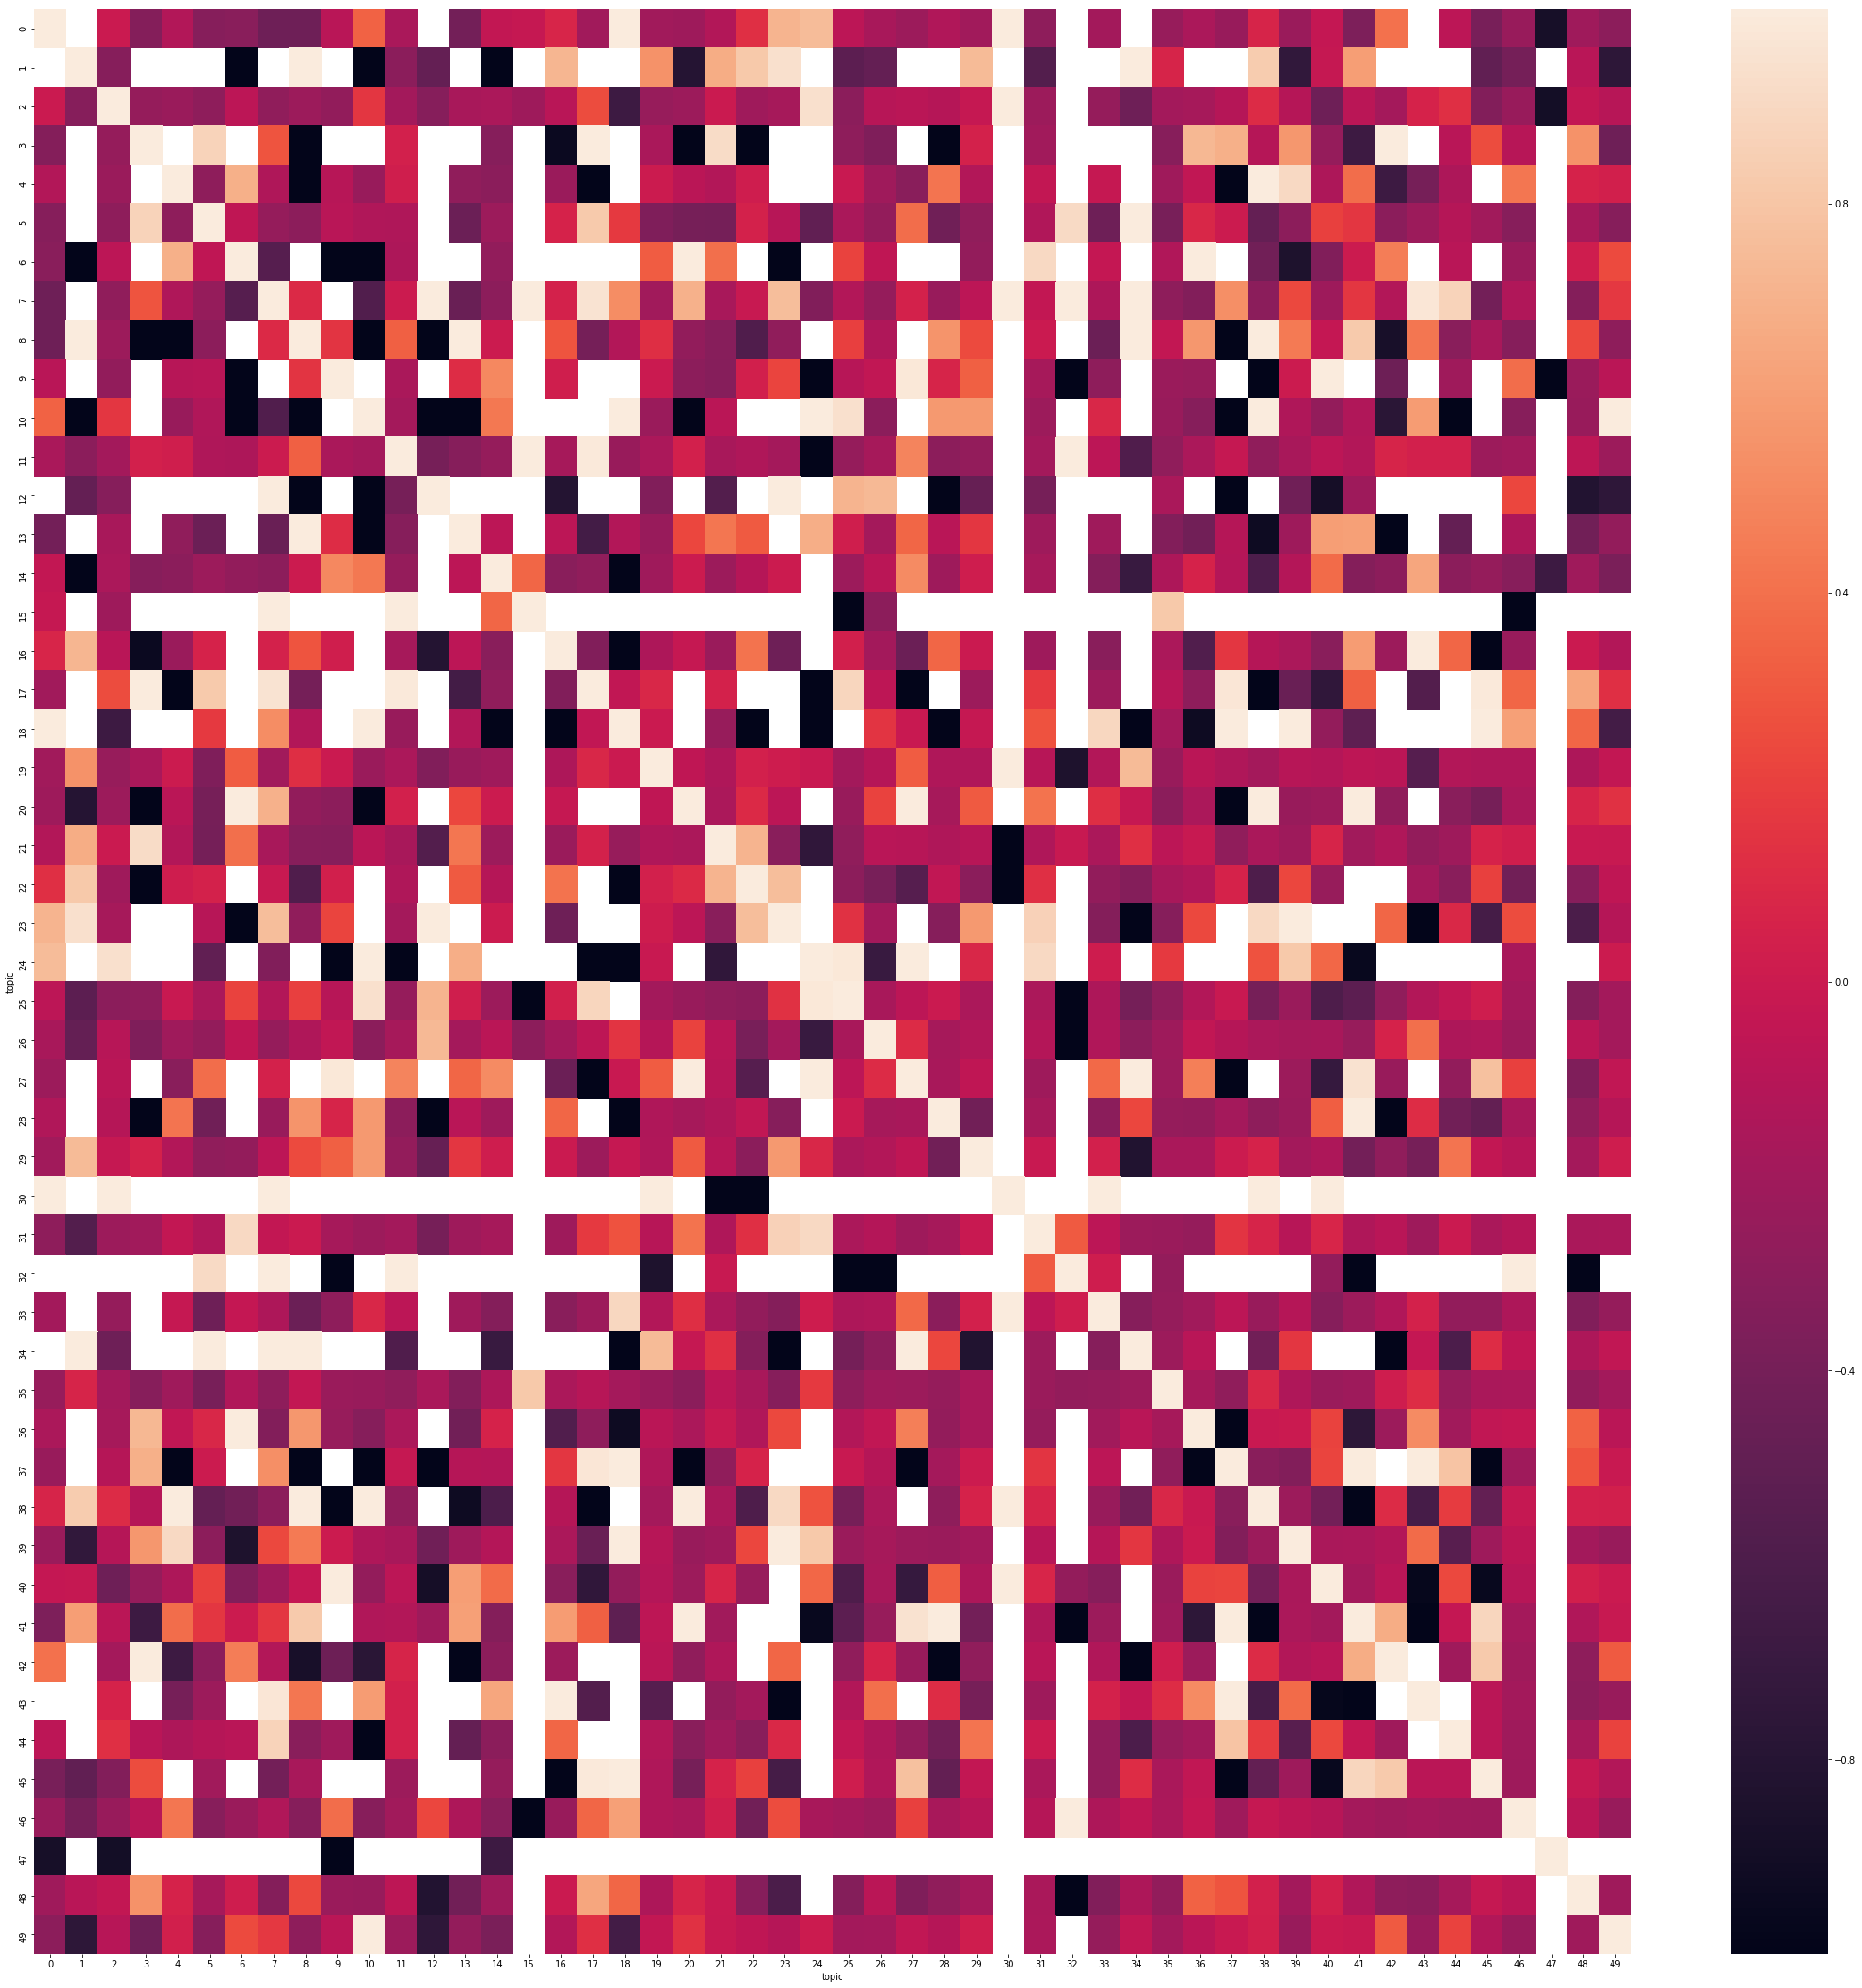

In [320]:
co_df = pd.DataFrame(t_distributions)
co_df.index.name = 'document'
co_df.columns.name = 'topic'

# co_df = co_df.fillna(0)
# co_df = co_df.astype(int)

import seaborn as sns

plt.figure(figsize=(40,40))
sns.heatmap(co_df.corr())


In [323]:
df_15 = pd.DataFrame(co_df.corr()[[15]])
df_15.abs().sort_values(15)

topic        15
topic          
0      0.031147
2      0.213714
26     0.289613
14     0.357037
35     0.816270
11     0.996960
7      1.000000
15     1.000000
25     1.000000
46     1.000000
1           NaN
3           NaN
4           NaN
5           NaN
6           NaN
8           NaN
9           NaN
10          NaN
12          NaN
13          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
27          NaN
28          NaN
29          NaN
30          NaN
31          NaN
32          NaN
33          NaN
34          NaN
36          NaN
37          NaN
38          NaN
39          NaN
40          NaN
41          NaN
42          NaN
43          NaN
44          NaN
45          NaN
47          NaN
48          NaN
49          NaN

In [301]:
sorted(model50.get_term_topics(fcorpus.dictionary.token2id['zola'], minimum_probability=0.0000000000000001), key=lambda x: x[1], reverse=True)

[(15, 0.006837586),
 (8, 0.00365749),
 (10, 0.001030925),
 (33, 0.00087878935),
 (26, 0.00029213564),
 (17, 0.00027754446),
 (31, 0.00020250336),
 (35, 0.00013103447),
 (41, 4.5465527e-05),
 (19, 2.5762582e-05),
 (36, 1.7292667e-05),
 (5, 4.525855e-06),
 (21, 7.958112e-08),
 (14, 4.8182386e-08)]

In [285]:
fcorpus.dictionary.token2id['dreyfus']

25378

In [130]:
docids = corpus_entity.select(type='volume', years=corpus_entity.years, output='ids')
[(corpus_entity.meta[doc[0]]['title'], doc) for doc in sorted(zip(docids, model30ent[mcorpus_entity]),
                                                      reverse=True, 
                                                      key=lambda doc: abs(dict(doc[1]).get(18, 0)))]

[('Staatkundig overzigt.', ('_gid001184801_01_0040', [(18, 0.9998089)])),
 ('Staatkundig overzigt.', ('_gid001184801_01_0018', [(18, 0.9997105)])),
 ('Staatkundig overzigt.',
  ('_gid001184801_01_0012', [(18, 0.99488354), (26, 0.004802788)])),
 ('Staatkundig overzigt.',
  ('_gid001184801_01_0050', [(15, 0.0071264575), (18, 0.99258703)])),
 ('Staatkundig overzigt.',
  ('_gid001184801_01_0055', [(15, 0.010120335), (18, 0.9897065)])),
 ('Staatkundig overzigt.',
  ('_gid001184801_01_0046',
   [(2, 0.0028335517), (12, 0.022258254), (18, 0.9746717)])),
 ('Westminster en St. Pauls.',
  ('_gid001184801_01_0003', [(11, 0.027193097), (18, 0.9724202)])),
 ('Staatkundig overzigt.',
  ('_gid001184801_01_0034', [(15, 0.07502945), (18, 0.92467785)])),
 ('Staatkundig overzigt.',
  ('_gid001184801_01_0006',
   [(12, 0.053738356), (15, 0.024985818), (18, 0.921008)])),
 ('Staatkundig overzigt.',
  ('_gid001184801_01_0065',
   [(9, 0.03568229), (15, 0.050142903), (18, 0.913953)])),
 ('Staatkundig overzigt

In [14]:
def list_latex(model, mcorpus, fcorpus, fileprefix="", num_words=30, filename=None):
    """
    Build a list of topic terms, a corresponding document,
    and the proportion of the topic in the corpus. 
    """
    docids = fcorpus.select(type='volume', years=fcorpus.years, output='ids')
    
    # get topic proportion
    
    topic_proportion = get_topic_proportion(model, mcorpus, fcorpus)    
    topic_proportion_sort = topic_proportion.index
    
    latex = """
\\begin{footnotesize}
\\begin{itemize}"""
    
    for t in topic_proportion_sort:
        logging.info(str(t))
        
        
        distinctive_documents = get_distinctive_document(model, mcorpus, fcorpus, t, num_documents=1)
        if distinctive_documents:
            title, docid, probability = distinctive_documents[0]
            subcaption = "{title}}}\\\\\n{{\\scriptsize \n\\textbf{{Document id:}} {docid} \\textbf{{Probability:}} {p}\n}}".format(title=title,
                                                         docid=docid, 
                                                         p=str(probability)).replace('_', '\\_')
        else:
            subcaption = ""
        
        # get the topic terms
        terms = model.show_topic(t, num_words)  
        
        latexstring = " ".join([term[0].replace('_', '\\_') for term in terms]) + "\\\\\n\\" + "textbf{Proportion:} " + str(topic_proportion[t]) 
        
        if subcaption:
            termsdoc = latexstring + "\\\\\n\\" + "textbf{Document:} \\" + "textsl{" + subcaption
        else:
            termsdoc = latexstring
            
        latex += """
\\item[\\textbf{{Topic {{{t}}}}}:] {{{termsdoc}}}""".format(t=t, termsdoc=termsdoc)

    latex += """
\\end{itemize}
\\end{footnotesize}
"""
    
    if filename:
        with open(filename, 'w', encoding='utf-8') as outfile:
            outfile.write(latex)
            print("Output written to:", filename)
    
    return latex

In [ ]:
topic_list_200 = list_latex(model200, mcorpus, fcorpus, filename="1894-1906_topic_list_200.tex")

/home/vanwissen/.conda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vanwissen/.conda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
2018-09-25 19:33:54,279 : INFO : 5
2018-09-25 19:34:25,418 : INFO : 139
2018-09-25 19:35:11,814 : INFO : 68
2018-09-25 19:36:18,327 : INFO : 52
2018-09-25 19:37:41,873 : INFO : 65
2018-09-25 19:39:04,240 : INFO : 143
2018-09-25 19:40:38,737 : INFO : 107
2018-09-25 19:42:16,444 : INFO : 49
2018-09-25 19:43:50,027 : INFO : 35
2018-09-25 19:45:43,828 : INFO : 26


### Wordcloud Dreyfus
A large wordcloud for topic 15: Dreyfus affair

In [32]:
def generate_wordcloud(terms, t, prefix="", width=400, height=400, output='filename'):
    """
    """
    from wordcloud import WordCloud 
    
    os.makedirs('images', exist_ok=True)
    
    wordcloud = WordCloud(background_color='white',
                          mode="RGB", 
                          width=width, 
                          height=height, 
                          font_step=10, 
                          relative_scaling=0.2, 
                          font_path="../../data/palatino.otf", 
                          color_func=lambda *args, **kwargs: "black")
    
    wordcloud.fit_words(dict(terms))
    
#     plt.axis("off")
#     plt.imshow(wordcloud, interpolation="bilinear")
    
    filename = "images/" + prefix + '_wordcloud' + str(t).zfill(3) + '.png'
    
    wordcloud.to_file(filename)
    
    if output == 'filename':
        return filename
    else:
        return wordcloud
    
    

In [200]:
# topic 6, 7 and 24
generate_wordcloud(model50.show_topic(15, 500), 15, '1894-1906_50', width=1000, height=600)

'images/1894-1906_50_wordcloud015.png'

![](images/1848_100_wordcloud006.png)

In [199]:
model50.show_topic(15, 500)

[('dreyfus', 0.01701942),
 ('leger', 0.016247042),
 ('militair', 0.010411369),
 ('kracht', 0.00967082),
 ('dreyfuszaak', 0.009004404),
 ('zola', 0.0072809327),
 ('proces', 0.007167487),
 ('judas', 0.006641781),
 ('verrader', 0.005629133),
 ('frankrijk', 0.0056087663),
 ('intellect', 0.005431973),
 ('volk', 0.0044407696),
 ('jood', 0.004437738),
 ('verite', 0.004433434),
 ('zaak', 0.004234612),
 ('staf', 0.0040532886),
 ('recht', 0.0040378114),
 ('samenleving', 0.0036273263),
 ('strijd', 0.0035152943),
 ('groep', 0.0032915133),
 ('generaal', 0.00317184),
 ('kerk', 0.0031286455),
 ('verklaren', 0.0031065578),
 ('meening', 0.003089069),
 ('bijzonder', 0.0029857245),
 ('minister', 0.0027966842),
 ('voorbeeld', 0.0027649563),
 ('conservatief', 0.002725513),
 ('kring', 0.0026654694),
 ('rennes', 0.0026369558),
 ('verraad', 0.0026342687),
 ('franschman', 0.002357318),
 ('geweld', 0.0023412744),
 ('hooog', 0.0022704913),
 ('volstrekt', 0.002249678),
 ('generalen', 0.0022292775),
 ('intelligent

In [67]:
model30ent

In [144]:
import pyLDAvis
import pyLDAvis.gensim


pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model50, mcorpus, fcorpus.dictionary, sort_topics=False)
pyLDAvis.save_html(vis, 'lda.html')

/home/vanwissen/.conda/envs/py36/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [129]:
from sklearn.feature_extraction import DictVectorizer

def to_vector(model):
    rows = []
    
    for t in range(model.num_topics):
        row = dict(((i[0], i[1]) for i in model.show_topic(t, 30000)))
        rows.append(row)
        
    return rows

vec = DictVectorizer()

X = vec.fit_transform(X=to_vector(model50))
X.shape


(50, 26018)

In [142]:
from sklearn.manifold import MDS
pca = MDS(n_components=2, max_iter=3000)

X_pca = pca.fit_transform(pyLDAvis.js_PCoA(topic_term_dists))

plt.figure()
for i in range(X_pca.shape[0]):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    



In [135]:
pyLDAvis.js_PCoA(X.T)

ValueError: Sparse matrices are not supported by this function. Perhaps one of the scipy.sparse.linalg functions would work instead.

In [134]:
X.T

<26018x50 sparse matrix of type '<class 'numpy.float64'>'
	with 1300900 stored elements in Compressed Sparse Column format>

AttributeError: 'list' object has no attribute 'dim'

In [137]:
# topic_term_dists = 

from pyLDAvis.gensim import _extract_data
import pandas as pd
        
topic_term_dists = _extract_data(model50, mcorpus, fcorpus.dictionary)['topic_term_dists']

In [139]:
pyLDAvis.js_PCoA(topic_term_dists)

array([[-0.00265931,  0.07657702],
       [-0.00594607,  0.02868716],
       [-0.02494994,  0.09429204],
       [-0.13513009, -0.04229041],
       [ 0.20518407,  0.02169541],
       [-0.05151747, -0.06837103],
       [ 0.22578384,  0.07278654],
       [-0.01746569, -0.05310081],
       [-0.02287906,  0.05388403],
       [-0.08392491,  0.11592796],
       [ 0.20275215, -0.07441699],
       [ 0.23638689,  0.06520722],
       [-0.01386944, -0.0598495 ],
       [-0.16809287,  0.03365487],
       [-0.06815315,  0.03811306],
       [ 0.00843299, -0.06471925],
       [-0.07317641,  0.03309466],
       [-0.02724818, -0.08240512],
       [-0.0195674 ,  0.01784334],
       [-0.02586336, -0.06303484],
       [-0.09830815,  0.11930672],
       [ 0.27983861,  0.01424319],
       [-0.09012042,  0.12067026],
       [-0.11870905,  0.0809821 ],
       [-0.02011335, -0.09203128],
       [-0.14095321,  0.04864463],
       [ 0.03843432, -0.01049777],
       [ 0.00730087,  0.09542087],
       [-0.12911283,

In [161]:
for doc in fcorpus.meta.values():
#     print(doc)
    title = doc['title']
    if 'Dramatisch' in title:
        print(title, doc['year'])

Dramatisch overzicht. 1894
Dramatisch overzicht. 1895
Dramatisch overzicht. Proloog. 1895
Dramatisch overzicht. 1895
Dramatisch overzicht. 1895
Dramatisch overzicht. 1895
Dramatisch overzicht. 1896
Dramatisch overzicht. 1896
Dramatische dictie. 1896
Dramatisch overzicht. 1896
Dramatisch overzicht. 1896
Dramatisch overzicht. 1896
Dramatisch overzicht. 1896
Dramatisch overzicht. 1896
Dramatisch overzicht. 1897
Dramatisch overzicht. 1897
Dramatisch overzicht. 1897
Dramatisch overzicht. 1897
Dramatisch overzicht. 1898
Dramatisch overzicht. 1898
Dramatisch overzicht. 1898
Dramatisch overzicht. 1898
Frederik. Dramatisch fragment . 1899
Dramatisch overzicht. 1899
Dramatisch overzicht. 1899
Dramatisch overzicht. 1899
Dramatisch overzicht. 1899
Dramatisch overzicht. 1899
Dramatisch overzicht. 1899
Dramatisch overzicht. 1900
Dramatisch overzicht. 1900
Dramatisch Overzicht. 1900
Dramatisch overzicht. 1900
Dramatisch overzicht. 1900
Dramatisch overzicht. 1900
Dramatisch overzicht. 1900
Dramatisch 